# Machine Learning and Statistics
## Lecturer: Ian Mcloughlin
## Project-2020

The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set.In this Jupyter notebook we explore the given data set and  trains a model using the data set. In the notebook also explain the model and give an analysis of its accuracy.

In [47]:
import numpy as np

In [48]:
# import seaborn 
import seaborn as sns
# Seaborn is a library for making statistical graphics in Python
#It is built on top of matplotlib and closely integrated with pandas data structures.

%matplotlib inline 
# https://stackoverflow.com/a/43028105 to fix the graph 
# import matplotlib
import matplotlib.pyplot as plt
#Matplotlib is a Python 2D plotting library 
#which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

# import pandas
import pandas as pd

# sklearn packages we need for regression import later in regression part to keep that altogather
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression

### Load Dataset

In [49]:
df = pd.read_csv("./powerproduction.csv")


### Exploratory Data Analysis(EDA)
EDA is an analysis approach that focuses on identifying general patterns in the data and to find previously unknown relationships.

In [50]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [51]:
df.shape

(500, 2)

In [52]:
df.columns

Index(['speed', 'power'], dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Statistical summary

In [54]:
print(df.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


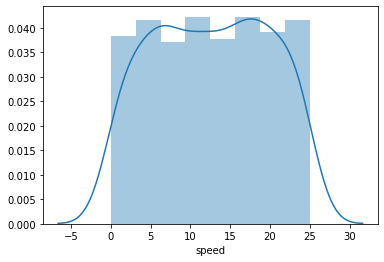

In [55]:
sns.distplot(df['speed'])

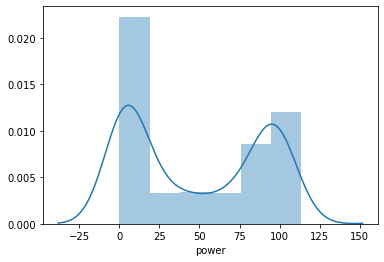

In [56]:
sns.distplot(df['power'])

### scatter plot

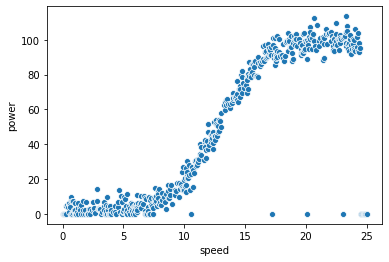

In [57]:
sns.scatterplot(x='speed',y='power',data = df)

There are few outliears

The shape of the graph is like S

Linear Regression

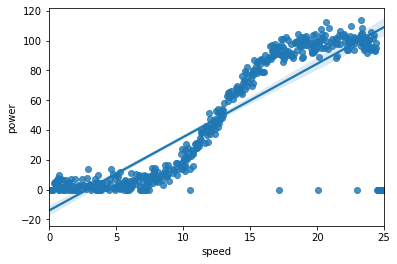

In [58]:
sns.regplot(x='speed',y='power',data = df)
plt.show()

### Outliers
as you can see from the above graph that the are some outliers that are at power 0 to check the number of outliers<br>
Wikipedia definition,<br>
In statistics, an outlier is an observation point that is distant from other observations.

In [59]:
print (df[df.power == 0])
df2= df[df.power == 0]
df2.count()

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
15    0.726    0.0
16    0.751    0.0
24    1.026    0.0
26    1.076    0.0
31    1.301    0.0
35    1.552    0.0
37    1.677    0.0
39    1.827    0.0
42    2.027    0.0
43    2.077    0.0
44    2.102    0.0
47    2.252    0.0
60    3.128    0.0
65    3.504    0.0
67    3.579    0.0
70    3.679    0.0
73    3.779    0.0
74    3.804    0.0
75    3.879    0.0
83    4.429    0.0
89    4.880    0.0
105   5.556    0.0
110   5.781    0.0
111   5.806    0.0
114   5.931    0.0
133   6.782    0.0
135   6.857    0.0
136   6.957    0.0
140   7.107    0.0
149   7.432    0.0
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


speed    49
power    49
dtype: int64

there are 49 rows where power is 0

In [60]:
df.isin([0]).sum()

speed     1
power    49
dtype: int64

In [61]:
index = df[(df['power'] == 0)].index
df.drop(index, inplace=True)
#drop the rows where power is 0 to remove outliers

In [62]:
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


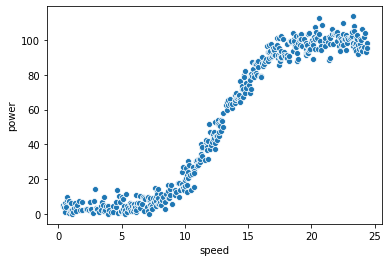

In [63]:
#graph after removing outliers
sns.scatterplot(x='speed',y='power',data = df)

positive S shaped function. As we look at the regplot it is obvious that the linear regression does not fit the data.

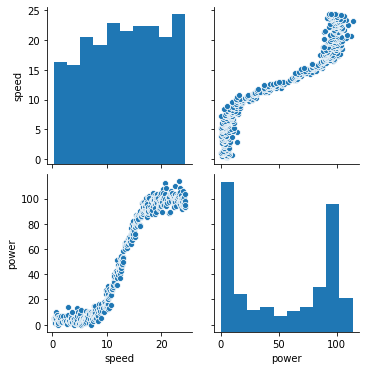

In [64]:
sns.pairplot(df)
plt.show()

## Fitting a Curve

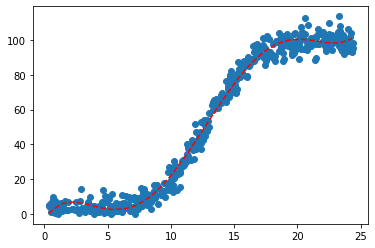

In [65]:
#
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 

# choose the input and output variables
x, y = df['speed'], df['power']
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()
# code adopted from https://machinelearningmastery.com/curve-fitting-with-python/

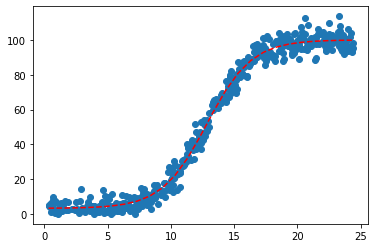

In [66]:
from scipy.optimize import curve_fit
xdata=df['speed']
ydata=df['power']
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0,method='dogbox')
plt.scatter(xdata, ydata)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(xdata), max(xdata), 1)
# calculate the output for the range
y_line = sigmoid(x_line, *popt)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()
# code adopted from https://stackoverflow.com/a/62215374

## Polynomial Model

In [67]:
#polynomial regression
X=df[['speed']]
y=df['power']

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

### Predicting the Results
In this step, we are going to predict the values Salary based on the Polynomial Regression model built. The “regressor.predict” function is used to predict the values for our independent variable, X_poly. We assign the predicted values as y_pred. We now have two data, y(real values) and y_pred (predicted values).

In [69]:
X_polytest = poly_reg.fit_transform(X_test)
y_pred = lin_reg.predict(X_polytest)
print(y_pred)

[ 11.39790215  -1.62571538 102.03226298  -0.24057934  10.81971486
 101.64802476  57.24854955  87.06720749  87.77062121   1.4405377
  12.9929142  101.94040422  95.29083285   3.38254716 103.12560007
  28.63136749 103.69290001   3.73650024  80.67407226  27.13621897
  95.29295643  66.41310002  72.80517356  53.98951669   6.98375941
   6.80424689 103.47797654  25.45229783 103.99205779 101.95764674
  -1.68731121  84.52270729  11.4738366    6.17248012  96.87658014
  17.3043931   92.98860822  75.98636953  13.33270775 100.23158207
   5.76614349   8.09897742   5.26292072  -1.88881915  37.95971209
  98.43853297  96.22864176   8.17712383   7.00868535 101.32074141
  38.41543985  -0.96180827  12.47704834  56.78404189 104.24863621
 103.86027873  95.83205558 104.29762124  10.01902942  65.96343485
   8.4853423   94.3101904   28.84653044 104.28284244   0.68564352
 103.70513865  89.81416911 102.64142258 103.61872914   5.63246742
   5.236803   103.03653744  -2.53074502  93.66652316 104.30947288
  -1.408542

In [70]:
#compare real value with predicted
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, 'difference':y_test-y_pred})
df

,Real Values,Predicted Values,difference
14,9.746,11.397902,-1.651902
59,3.063,-1.625715,4.688715
397,94.780,102.032263,-7.252263
107,3.036,-0.240579,3.276579
162,5.696,10.819715,-5.123715
...,...,...,...
292,72.135,70.635638,1.499362
319,87.192,82.044393,5.147607
442,101.190,103.155982,-1.965982
186,14.055,23.183716,-9.128716


### Visualising the Polynomial Regression results
In this last step, we shall visualize the polynomial model that was built using the given data and plot the values of “y” and “y_pred” on the graph and analyze the results

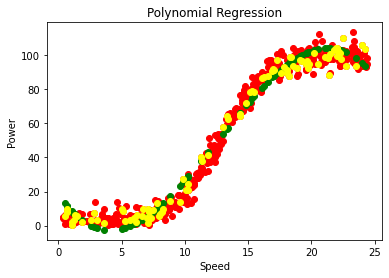

In [73]:
import numpy as np
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.scatter(X_test, y_test, color = 'yellow')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

In [78]:
poly_reg4 = PolynomialFeatures(degree = 5)# change degree
X_poly4 = poly_reg4.fit_transform(X_train)
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly4, y_train)
X_polytest4 = poly_reg4.fit_transform(X_test)
y_pred4 = lin_reg4.predict(X_polytest4)

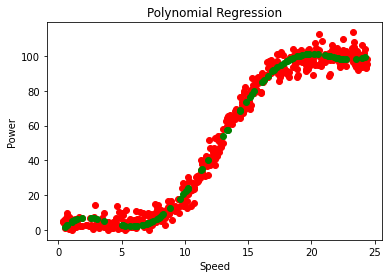

In [79]:
plt.scatter(X, y, color = 'red')
plt.scatter(X_test, y_pred4, color = 'green')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

### Save the model using joblib


In [101]:
import joblib 
  
# Save the model as a pickle in a file 
#joblib.dump(lin_reg, 'poly_reg.pkl') 

# Save the model as a pickle in a file 
joblib.dump(lin_reg4, 'poly_reg5.pkl') 

['poly_reg5.pkl']

## Neural Networks Model

2. Define Keras Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument and setting it to 8 for the 8 input variables.

How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation (I explain more about this here). Generally, you need a network large enough to capture the structure of the problem.

In this example, we will use a fully-connected network structure with three layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the input_dim=8 argument)
The first hidden layer has 12 nodes and uses the relu activation function.
The second hidden layer has 8 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.

In [29]:
# first neural network with keras
# For neural networks
import tensorflow.keras as kr
#import tensorflow as tf
# Create a Sequential model 
# kernel_initializer="glorot_uniform"
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation="sigmoid", kernel_initializer="glorot_uniform"))
# 2nd Hidden layer
model.add(kr.layers.Dense(40, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# 3rd Hidden layer
model.add(kr.layers.Dense(20, activation="sigmoid", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# Output layer
model.add(kr.layers.Dense(1, activation="linear", kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

Compile Keras Model
Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.
We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 

In [30]:
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


4. Fit Keras Model
We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

Epoch: One pass through all of the rows in the training dataset.
Batch: One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. For more on the difference between epochs and batches, see the post:

What is the Difference Between a Batch and an Epoch in a Neural Network?
The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.



In [31]:

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=500, batch_size=10,validation_data=(X_test, y_test))


Epoch 1/500
36/36 [==============================] - 3s 52ms/step - loss: 4412.2837 - val_loss: 4178.5659
Epoch 2/500
36/36 [==============================] - 0s 3ms/step - loss: 4851.8962 - val_loss: 4063.8835
Epoch 3/500
36/36 [==============================] - 0s 3ms/step - loss: 4356.6212 - val_loss: 3977.7661
Epoch 4/500
36/36 [==============================] - 0s 3ms/step - loss: 4408.4675 - val_loss: 3909.8049
Epoch 5/500
36/36 [==============================] - 0s 3ms/step - loss: 4346.3586 - val_loss: 3847.7573
Epoch 6/500
36/36 [==============================] - 0s 3ms/step - loss: 4066.6894 - val_loss: 3790.9797
Epoch 7/500
36/36 [==============================] - 0s 3ms/step - loss: 4248.0305 - val_loss: 3733.9763
Epoch 8/500
36/36 [==============================] - 0s 3ms/step - loss: 3855.9577 - val_loss: 3679.8186
Epoch 9/500
36/36 [==============================] - 0s 3ms/step - loss: 4310.4579 - val_loss: 3628.9431
Epoch 10/500
36/36 [==============================] - 

36/36 [==============================] - 0s 3ms/step - loss: 1976.1520 - val_loss: 1888.2069
Epoch 79/500
36/36 [==============================] - 0s 3ms/step - loss: 2045.3932 - val_loss: 1876.9194
Epoch 80/500
36/36 [==============================] - 0s 3ms/step - loss: 1935.4078 - val_loss: 1866.0664
Epoch 81/500
36/36 [==============================] - 0s 3ms/step - loss: 2078.5646 - val_loss: 1855.4777
Epoch 82/500
36/36 [==============================] - 0s 3ms/step - loss: 1877.7003 - val_loss: 1845.9789
Epoch 83/500
36/36 [==============================] - 0s 3ms/step - loss: 2158.2700 - val_loss: 1835.6899
Epoch 84/500
36/36 [==============================] - 0s 3ms/step - loss: 1996.0152 - val_loss: 1826.6486
Epoch 85/500
36/36 [==============================] - 0s 3ms/step - loss: 1952.8917 - val_loss: 1817.1761
Epoch 86/500
36/36 [==============================] - 0s 3ms/step - loss: 2066.4396 - val_loss: 1807.6200
Epoch 87/500
36/36 [==============================] - 0s 3m

36/36 [==============================] - 0s 3ms/step - loss: 661.3056 - val_loss: 626.6870
Epoch 156/500
36/36 [==============================] - 0s 3ms/step - loss: 661.0101 - val_loss: 608.6329
Epoch 157/500
36/36 [==============================] - 0s 3ms/step - loss: 647.3941 - val_loss: 590.2499
Epoch 158/500
36/36 [==============================] - 0s 3ms/step - loss: 717.2709 - val_loss: 573.0618
Epoch 159/500
36/36 [==============================] - 0s 3ms/step - loss: 625.2528 - val_loss: 556.4348
Epoch 160/500
36/36 [==============================] - 0s 3ms/step - loss: 606.0441 - val_loss: 542.7796
Epoch 161/500
36/36 [==============================] - 0s 3ms/step - loss: 611.7996 - val_loss: 524.4485
Epoch 162/500
36/36 [==============================] - 0s 3ms/step - loss: 583.9995 - val_loss: 511.6001
Epoch 163/500
36/36 [==============================] - 0s 3ms/step - loss: 509.0965 - val_loss: 497.2205
Epoch 164/500
36/36 [==============================] - 0s 3ms/step - 

36/36 [==============================] - 0s 3ms/step - loss: 54.6140 - val_loss: 53.2172
Epoch 234/500
36/36 [==============================] - 0s 3ms/step - loss: 50.0925 - val_loss: 52.1661
Epoch 235/500
36/36 [==============================] - 0s 3ms/step - loss: 50.0957 - val_loss: 50.6678
Epoch 236/500
36/36 [==============================] - 0s 3ms/step - loss: 47.6275 - val_loss: 48.7615
Epoch 237/500
36/36 [==============================] - 0s 3ms/step - loss: 46.3274 - val_loss: 46.8224
Epoch 238/500
36/36 [==============================] - 0s 3ms/step - loss: 48.6069 - val_loss: 46.2228
Epoch 239/500
36/36 [==============================] - 0s 3ms/step - loss: 43.6501 - val_loss: 44.4019
Epoch 240/500
36/36 [==============================] - 0s 3ms/step - loss: 43.7193 - val_loss: 43.6123
Epoch 241/500
36/36 [==============================] - 0s 3ms/step - loss: 47.5975 - val_loss: 41.9956
Epoch 242/500
36/36 [==============================] - 0s 3ms/step - loss: 42.0196 - va

36/36 [==============================] - 0s 3ms/step - loss: 16.8111 - val_loss: 19.6024
Epoch 313/500
36/36 [==============================] - 0s 3ms/step - loss: 16.3812 - val_loss: 19.0152
Epoch 314/500
36/36 [==============================] - 0s 3ms/step - loss: 15.9095 - val_loss: 20.7176
Epoch 315/500
36/36 [==============================] - 0s 3ms/step - loss: 18.8857 - val_loss: 18.9799
Epoch 316/500
36/36 [==============================] - 0s 3ms/step - loss: 16.2881 - val_loss: 19.5281
Epoch 317/500
36/36 [==============================] - 0s 3ms/step - loss: 18.2731 - val_loss: 19.3265
Epoch 318/500
36/36 [==============================] - 0s 3ms/step - loss: 17.7313 - val_loss: 21.8485
Epoch 319/500
36/36 [==============================] - 0s 3ms/step - loss: 20.9560 - val_loss: 19.3283
Epoch 320/500
36/36 [==============================] - 0s 3ms/step - loss: 16.6787 - val_loss: 21.0020
Epoch 321/500
36/36 [==============================] - 0s 3ms/step - loss: 18.5039 - va

36/36 [==============================] - 0s 3ms/step - loss: 17.1458 - val_loss: 22.2167
Epoch 392/500
36/36 [==============================] - 0s 3ms/step - loss: 15.0570 - val_loss: 19.6113
Epoch 393/500
36/36 [==============================] - 0s 3ms/step - loss: 17.3226 - val_loss: 18.8058
Epoch 394/500
36/36 [==============================] - 0s 3ms/step - loss: 12.6314 - val_loss: 18.9120
Epoch 395/500
36/36 [==============================] - 0s 3ms/step - loss: 15.0598 - val_loss: 21.3406
Epoch 396/500
36/36 [==============================] - 0s 3ms/step - loss: 16.8322 - val_loss: 18.8780
Epoch 397/500
36/36 [==============================] - 0s 3ms/step - loss: 19.7904 - val_loss: 20.7844
Epoch 398/500
36/36 [==============================] - 0s 3ms/step - loss: 17.1053 - val_loss: 22.2850
Epoch 399/500
36/36 [==============================] - 0s 3ms/step - loss: 17.1027 - val_loss: 19.0522
Epoch 400/500
36/36 [==============================] - 0s 3ms/step - loss: 15.1758 - va

36/36 [==============================] - 0s 3ms/step - loss: 18.6938 - val_loss: 18.9442
Epoch 471/500
36/36 [==============================] - 0s 3ms/step - loss: 18.0565 - val_loss: 23.2962
Epoch 472/500
36/36 [==============================] - 0s 3ms/step - loss: 20.0861 - val_loss: 21.4058
Epoch 473/500
36/36 [==============================] - 0s 3ms/step - loss: 16.7206 - val_loss: 18.8652
Epoch 474/500
36/36 [==============================] - 0s 3ms/step - loss: 15.8787 - val_loss: 19.1735
Epoch 475/500
36/36 [==============================] - 0s 3ms/step - loss: 17.6884 - val_loss: 18.9108
Epoch 476/500
36/36 [==============================] - 0s 3ms/step - loss: 18.4768 - val_loss: 20.5560
Epoch 477/500
36/36 [==============================] - 0s 3ms/step - loss: 15.8323 - val_loss: 18.7634
Epoch 478/500
36/36 [==============================] - 0s 3ms/step - loss: 17.5729 - val_loss: 22.0576
Epoch 479/500
36/36 [==============================] - 0s 3ms/step - loss: 16.2790 - va

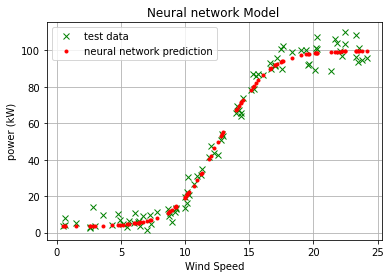

In [32]:
# Look at prediction for the test data
plt.plot(X_test, y_test, 'gx', label="test data")
plt.plot(X_test, model.predict(X_test), 'r.', label="neural network prediction")
plt.xlabel('Wind Speed')
plt.ylabel('power (kW)')
plt.title("Neural network Model ")
plt.grid()
plt.legend()
plt.show()

5. Evaluate Keras Model
We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the evaluate() function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.



In [33]:
...
# evaluate the keras model
loss= model.evaluate(X_test, y_test)
print('loss: %.2f' % (loss))

3/3 [==============================] - 0s 3ms/step - loss: 18.8207
loss: 18.82


In [34]:
predictions = model.predict(X_test)
# summarize the first 5 cases
#results=pd.DataFrame(columns=['wind speed','predicted power','actual value'])
df = pd.DataFrame(X_test)
df['predicted power']=predictions
df['actual value']=y_test
#results['wind speed']=pd.Series()
#results['predicted power']=predictions
#results['actual value']=y_test
#results
df


,speed,predicted power,actual value
125,6.356,5.458413,5.842
258,12.888,54.196472,53.954
56,3.003,3.643669,3.578
411,20.320,98.641129,100.699
339,17.142,92.494644,95.622
...,...,...,...
434,21.847,99.298149,103.922
88,4.780,4.209001,10.444
387,19.444,97.825691,100.372
439,22.222,99.378845,96.650


In [35]:
from sklearn import metrics
#nn_predict=model.perdict(X_test)
#from sklearn import metrics
print(metrics.accuracy_score(np.array(y_test), np.array(y_pred)))
#print('accuracy ({0:.4f})'.format(metrics.accuracy_score(y_test,predictions)))

ValueError: continuous is not supported

In [ ]:
model.save("neural_model.h5")
print("Neural network model saved as neural_model.h5")

## Random Forest Model

In [87]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [92]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores

In [95]:
rmodel=rfr_model(X_train,y_train)
rmodel

array([-2.01896265, -4.01580647, -3.38062471, -2.70549397, -2.63420149,
       -2.08876539, -3.75063988, -4.15544857, -2.34235691, -2.81367468])

In [96]:
reg2 = RandomForestRegressor(random_state=1)
reg2.fit(X_train, y_train)
pred2 = reg2.predict(X_test)

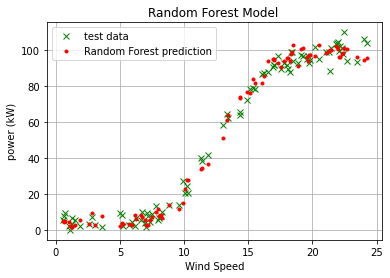

In [99]:
# Look at prediction for the test data
plt.plot(X_test, y_test, 'gx', label="test data")
plt.plot(X_test, reg2.predict(X_test), 'r.', label="Random Forest prediction")
plt.xlabel('Wind Speed')
plt.ylabel('power (kW)')
plt.title("Random Forest Model ")
plt.grid()
plt.legend()
plt.show()

In [100]:
#joblib.dump(reg2, 'randomF_model.pkl') 

['randomF_model.pkl']

In [ ]:
#for using virtual env
#python -m venv --system-site-packages .\venv
#.\venv\Scripts\activate

# References

 1. What is the Sigmoid Function? https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function#:~:text=One%20of%20the%20most%20widely,range%20(0%2C%201).&text=A%20sigmoid%20function%20placed%20as,to%20work%20with%20and%20interpret.
 2. Ways to Detect and Remove the Outliers https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba accessed 19/11/2020
 3. Understanding Non-Linear Regression available online from https://medium.com/towards-artificial-intelligence/understanding-non-linear-regression-fbef9a396b71 accessed on 22/12/2020
 4. Machine Learning Basics: Polynomial Regression https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1 accessed on 23/12/2020
5. https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226